In [1]:
#Importing Libraries:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Reading the data:
train_df = pd.read_csv(r'C:\Vishnu Vardhan\SUNY Buffalo\Fall 2023\Statistical Machine Learning\Project\Data\train_1.csv')
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
#Filling NA values with 0:
train_df = train_df.fillna(0)

In [4]:
#Checking dimensions and size of the data:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [5]:
#Defining a function to extract the page langauge from the page name:
def find_language(url):
    res = re.search('[a-z][a-z].wikipedia.org',url)
    if res:
        return res[0][0:2]
    return 'na'

#Creating a new variable 'lang' that contains the language of the corresponding page.
train_df['lang'] = train_df.Page.map(find_language)

In [6]:
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh


In [7]:
#Aggregating the views of all English language pages for all dates:
en_views_per_page = train_df[train_df.lang=='en'].iloc[:,1:-1]
data = pd.DataFrame(en_views_per_page.sum(axis=0), columns = ['Views'])
data.index = pd.to_datetime(data.index)
data.head(5)

,Views
2015-07-01,84712190.0
2015-07-02,84438545.0
2015-07-03,80167728.0
2015-07-04,83463204.0
2015-07-05,86198637.0


In [8]:
#Checking for missing values:
Total = data.isnull().sum().sort_values(ascending = False)          
Percent = (data.isnull().sum()*100/data.isnull().count()).sort_values(ascending = False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
Views,0,0.0


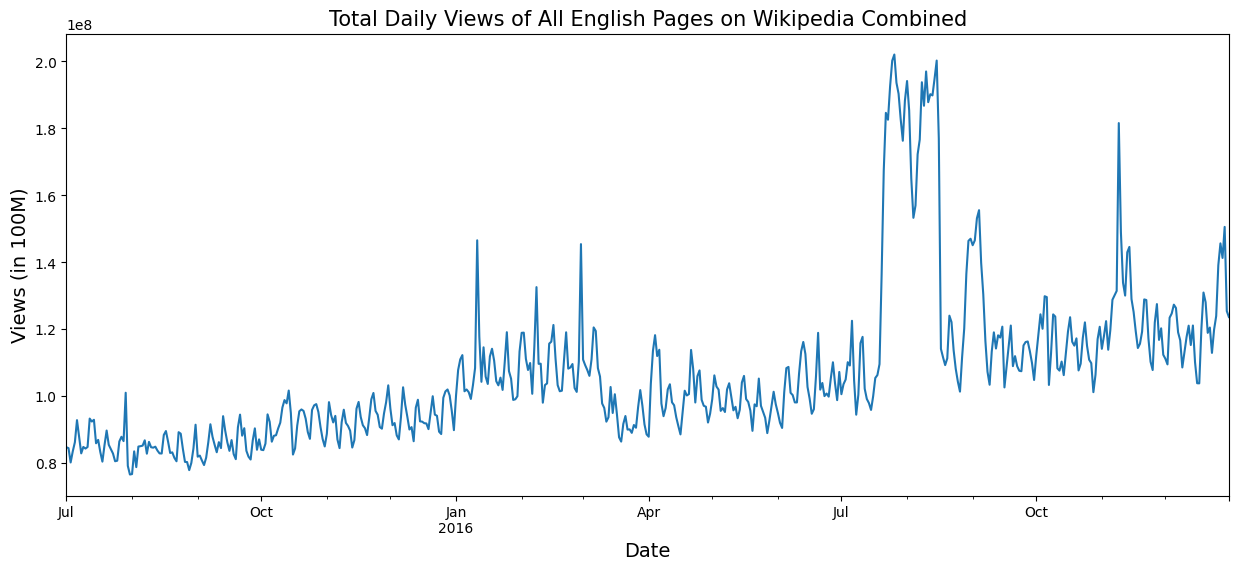

In [9]:
#Plotting the total daily views:
data.plot(figsize = (15, 6), legend = None)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Views (in 100M)', fontsize = 14)
plt.title('Total Daily Views of All English Pages on Wikipedia Combined', fontsize = 15)
plt.show()

There are several spikes in the observed daily views. These are caused by exogenous factors such as news and social media popularity/virality.

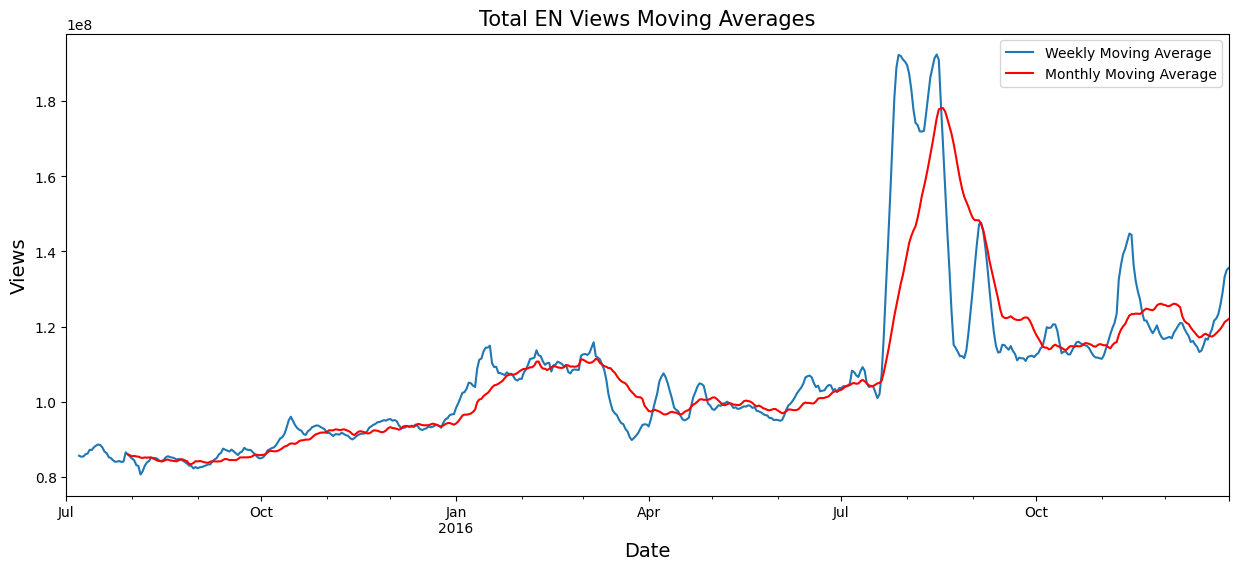

In [10]:
#Plotting the weekly and monthly moving averages:
yearly = data['Views'].rolling(window = 7).mean()
fiveyearly = data['Views'].rolling(window = 30).mean()
MAax = yearly['2015':].plot(figsize = (15, 6), label = 'Weekly Moving Average')
fiveyearly['2015':].plot(ax = MAax, color = 'red', label = 'Monthly Moving Average')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Views', fontsize = 14)
plt.title('Total EN Views Moving Averages', fontsize = 15)
plt.legend()
plt.show()

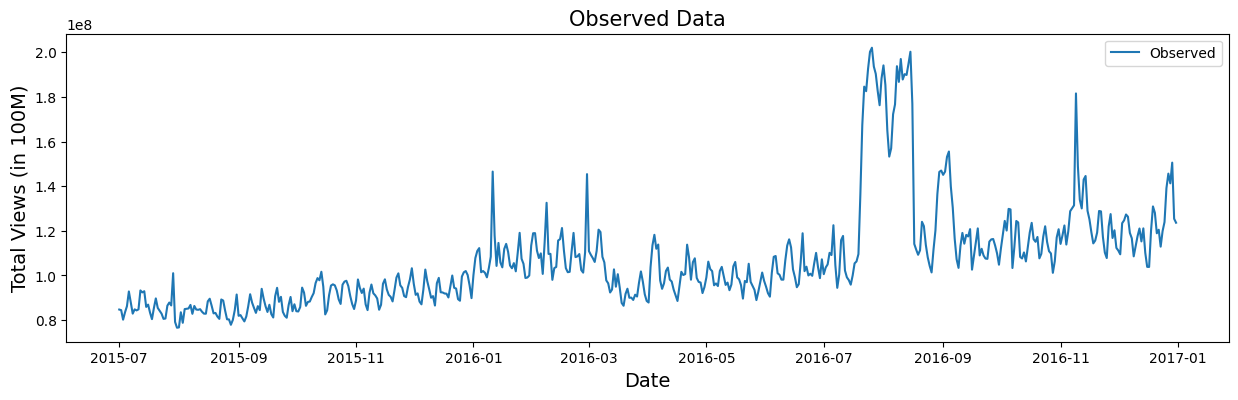

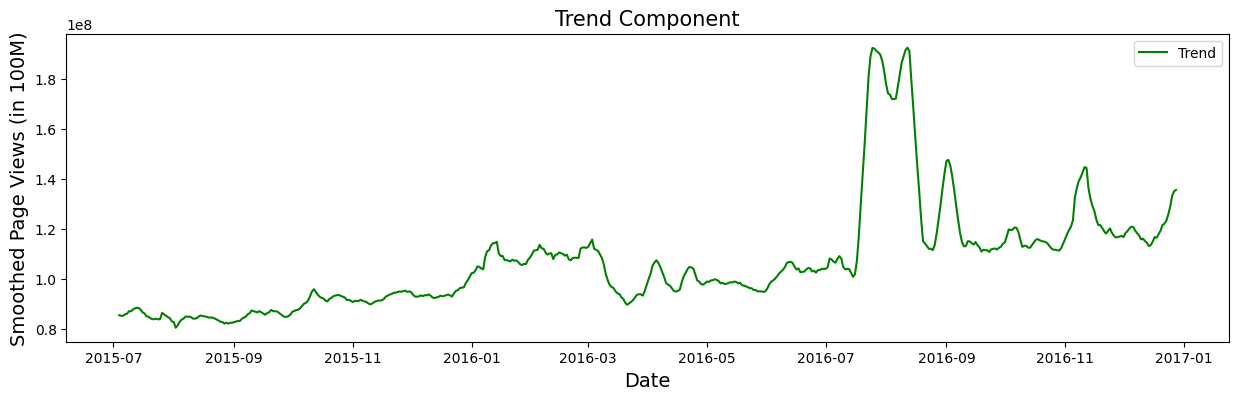

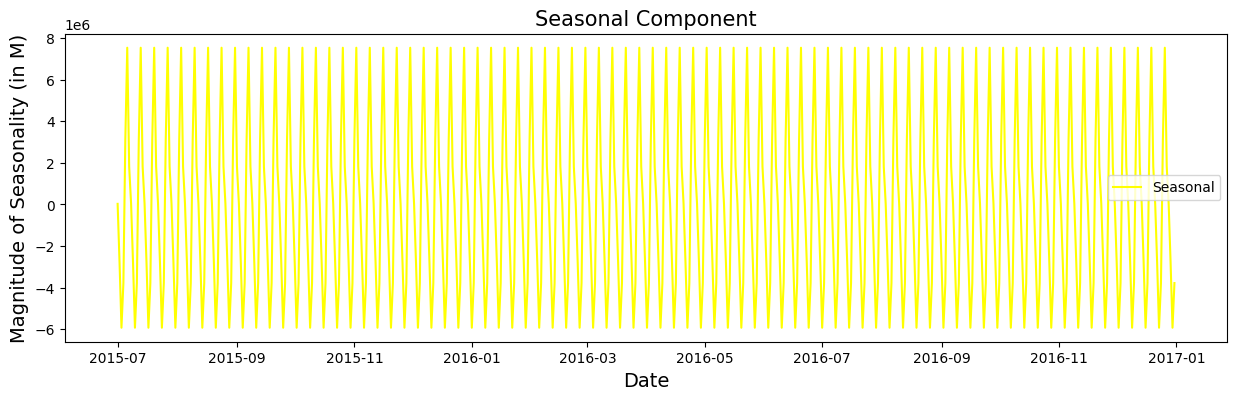

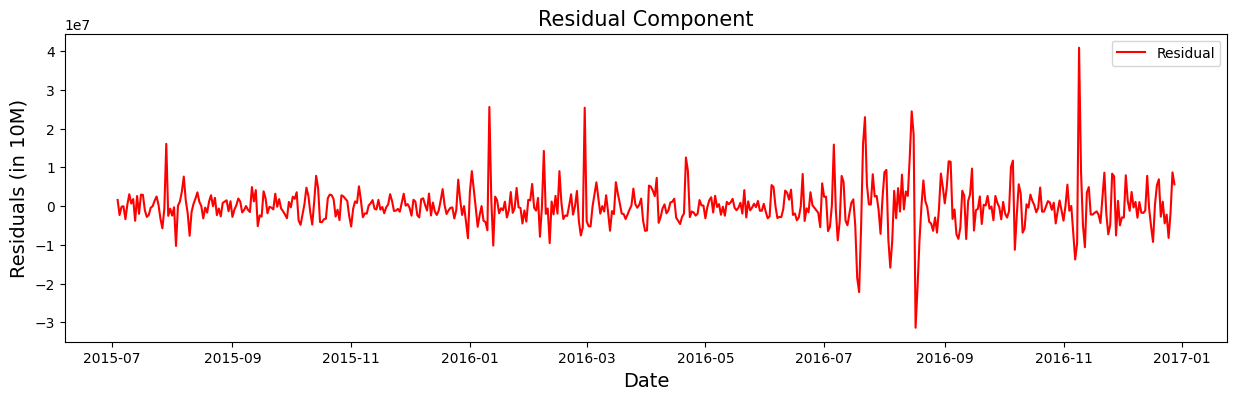

In [11]:
#Decomposing the time series:
decomposition = seasonal_decompose(data)

#Plotting the observed values:
observed = decomposition.observed
plt.figure(figsize = (15, 4))
plt.plot(observed, label = 'Observed')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Total Views (in 100M)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Observed Data", fontsize = 15)
plt.show()

#Plotting the trend component:
trend = decomposition.trend
plt.figure(figsize = (15, 4))
plt.plot(trend, label = 'Trend', color = 'green')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Smoothed Page Views (in 100M)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Trend Component", fontsize = 15)
plt.show()

#Plotting the seasonal component:
seasonal = decomposition.seasonal
plt.figure(figsize = (15, 4))
plt.plot(seasonal, label = 'Seasonal', color = 'yellow')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Magnitude of Seasonality (in M)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Seasonal Component", fontsize = 15)
plt.show()

#Plotting the residual component:
residual = decomposition.resid
plt.figure(figsize = (15, 4))
plt.plot(residual, label = 'Residual', color = 'red')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Residuals (in 10M)', fontsize = 14)
plt.legend(loc = 'best')
plt.title("Residual Component", fontsize = 15)
plt.show()

There's a clear seasonal component in the data. This could indicate non-stationarity of data.

To confirm stationarity/non-stationarity of data, we will perform the Augmented Dickey-Fuller (ADF) test as well as the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test. The ADF test tests for a unit root in the time series. If the test statistic is less than the critical value, we reject the null hypothesis of a unit root, and the series is considered stationary. The KPSS test tests for the presence of a trend-stationarity. If the test statistic is greater than the critical value, we reject the null hypothesis that the series is trend-stationary, implying that the series is non-stationary.

In [12]:
from statsmodels.tsa.stattools import adfuller

#ADF Test:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                  -2.247284
p-value                          0.189534
No. of Lags Used                14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


In [13]:
from statsmodels.tsa.stattools import kpss

#KPSS Test:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')
    kpss_output = pd.Series(kpsstest[0:3], index = ['Test Statistic','p-value','No. of Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(data)

Results of KPSS Test:
Test Statistic            1.513397
p-value                   0.010000
No. of Lags Used         19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\vishn\AppData\Local\Temp\ipykernel_94928\2926373317.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression = 'c', nlags = 'legacy')


In both tests the test statistic is greater than the critical value, implying that the time series is not stationary. Usually differencing is performed to make the data stationary but we will be using the AutoARIMA model which will automatically detect the differencing order needed to make the time series stationary.

In [14]:
#Resampling the data with daily frequency:
y = data['Views'].resample('D').mean()
y.head()

2015-07-01    84712190.0
2015-07-02    84438545.0
2015-07-03    80167728.0
2015-07-04    83463204.0
2015-07-05    86198637.0
Freq: D, Name: Views, dtype: float64

In [15]:
#Splitting the data into training and testing sets:
train = y[:'2016-09-30']
test = y['2016-10-01':]

In [16]:
from pmdarima.arima import auto_arima
#Using Auto-ARIMA to Find Optimal Values of the Hyperparameters (we set m=7 as there seems to be approximately a weekly seasonality and every step is 1 day):
arima_model = auto_arima(train, seasonal = True, m = 7, stepwise = False, trace = 1, random_state = 10)

 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=15817.071, Time=0.01 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=15805.602, Time=0.04 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=15800.050, Time=0.16 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=15801.913, Time=0.16 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=15738.652, Time=0.15 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=15736.715, Time=0.42 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=15789.844, Time=0.53 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=15736.784, Time=0.32 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=15816.294, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=15806.090, Time=0.14 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=15800.788, Time=0.23 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=15802.717, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=15740.272, Time=0.20 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=15738.315, Time=0.58 sec
 

In [17]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  458
Model:             SARIMAX(0, 1, 0)x(1, 0, [1, 2], 7)   Log Likelihood               -7863.357
Date:                                Wed, 06 Dec 2023   AIC                          15736.715
Time:                                        23:09:27   BIC                          15757.338
Sample:                                    07-01-2015   HQIC                         15744.838
                                         - 09-30-2016                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.398e+04   4.32e+04      1.019      0.308   -4.06e+04    1.29e+05
ar.S.L7        0.9637      0.027     35.438      0.000       0.910       1.017
ma.S.L7       -0.9872      0.063    -15.782      0.000      -1.110      -0.865
ma.S.L14       0.0987      0.049      2.012      0.044       0.003       0.195
sigma2      6.237e+13      0.000   1.81e+17      0.000    6.24e+13    6.24e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):              5309.09
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               3.84   Skew:                            -1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.52e+31. Standard errors may be unstable.
"""

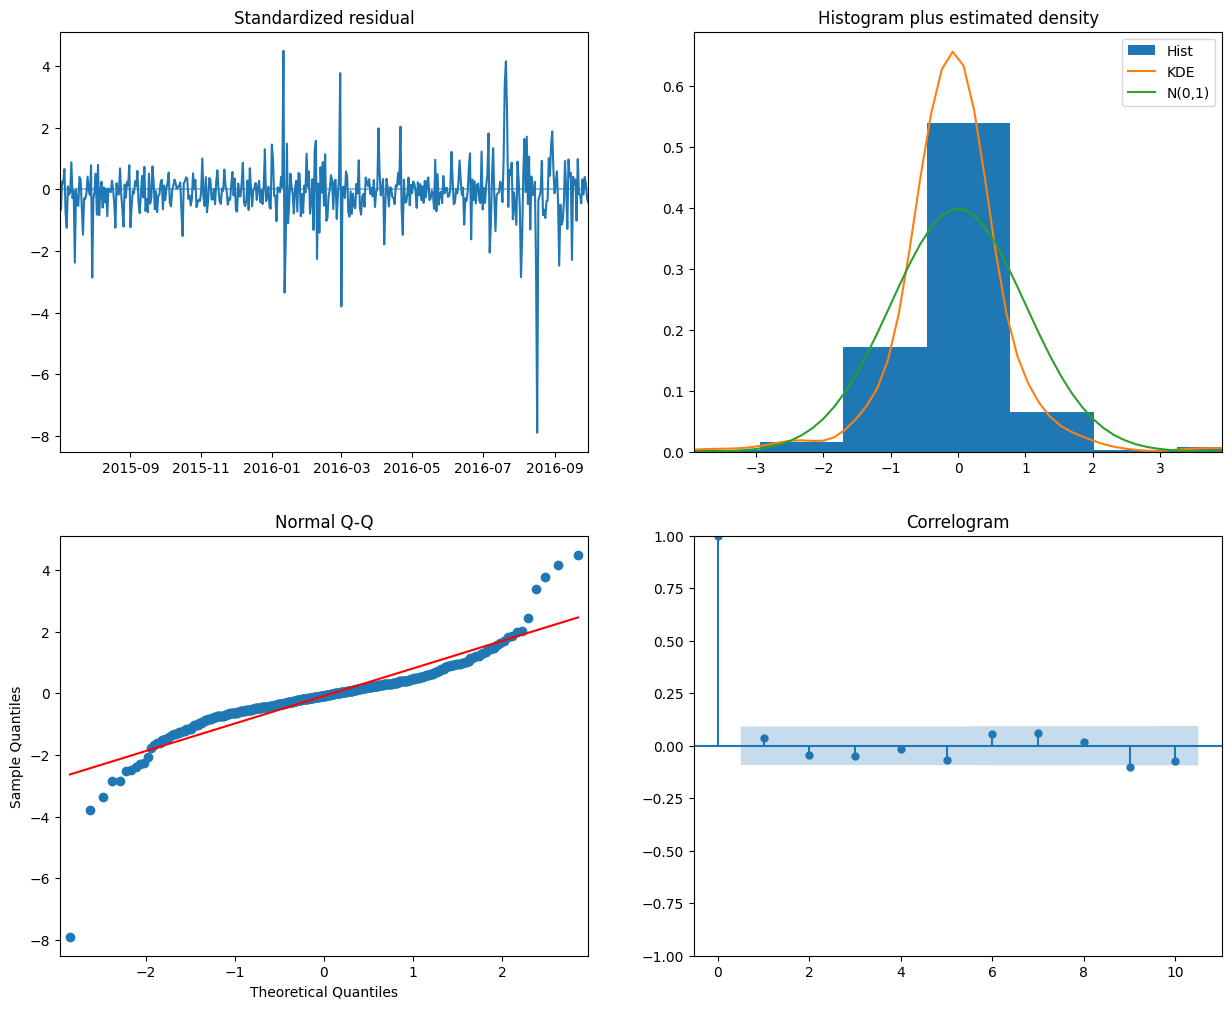

In [18]:
arima_model.plot_diagnostics(figsize = (15, 12))
plt.show()

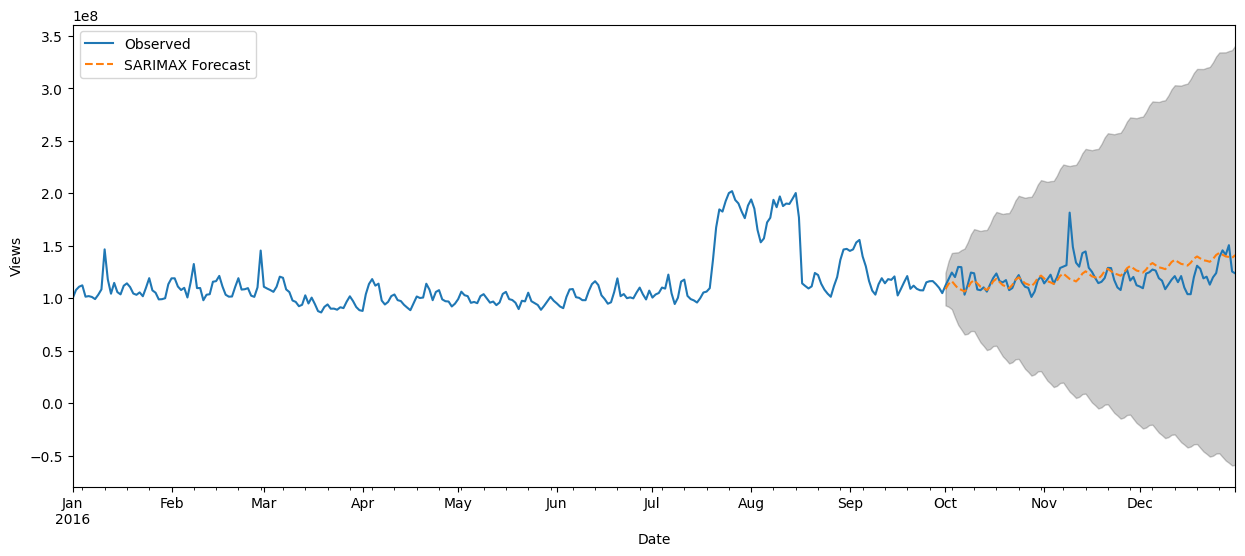

In [19]:
#Getting the SARIMA forecast with number of steps as 92 since we want to make 3 month prediction and our data is daily sampled.
forecast, conf_int = arima_model.predict(n_periods=92, return_conf_int = True)
#Plotting the observed and forecasted values:
ax1 = y['2016':].plot(label = 'Observed')
forecast.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
ax1.fill_between(forecast.index, conf_int[:, 0], conf_int[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Views')
plt.legend(loc = 'upper left')
plt.show()

In [20]:
#SARIMA model metics:

y_forecasted_SARIMAX = forecast
y_truth = test

mse_SARIMAX = ((y_forecasted_SARIMAX - y_truth) ** 2).mean()
print('The Root Mean Squared Error of SARIMAX forecast is {}'.format(round(np.sqrt(mse_SARIMAX), 2)))

denominator = (np.abs(y_truth) + np.abs(y_forecasted_SARIMAX)) / 2.0
diff = np.abs(y_truth - y_forecasted_SARIMAX) / denominator
diff[denominator == 0] = 0.0 # handling the case where the denominator is zero

print('The Symmetric Mean Absolute Percentage Error of SARIMAX forecast is {}'.format(round(100.0 * np.mean(diff))))

The Root Mean Squared Error of SARIMAX forecast is 13344923.64
The Symmetric Mean Absolute Percentage Error of SARIMAX forecast is 8


In [21]:
from sklearn.preprocessing import StandardScaler
#Scaling the data:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))

In [22]:
from keras.preprocessing.sequence import TimeseriesGenerator

#Defining the window size:
window_size = 7

#Generating batches of time series data:
train_generator = TimeseriesGenerator(train_scaled, 
                                      train_scaled, 
                                      length = window_size, 
                                      batch_size = 1)

In [23]:
import tensorflow as tf

#Defeining the model architechture:
model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(100, input_shape = (window_size, 1), return_sequences = True),
        tf.keras.layers.LSTM(50, return_sequences = True),
        tf.keras.layers.LSTM(10),
        tf.keras.layers.Dense(64, activation ='relu'),
        tf.keras.layers.Dense(32, activation ='relu'),
        tf.keras.layers.Dense(1)
])

In [24]:
#Using the MSE loss function and the Adam optimizer:
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 7, 50)             30200     
                                                                 
 lstm_2 (LSTM)               (None, 10)                2440      
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 76257 (297.88 KB)
Trainable params: 76257 

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(r"C:\Vishnu Vardhan\SUNY Buffalo\Fall 2023\Statistical Machine Learning\Project\Models\WikiENViewsModelW7.h5", 
                             monitor = 'loss', save_best_only = True)

In [26]:
#Setting random seeds for python, numpy and tensorflow to ensure repeatable resultsb.
import random as rd
rd.seed(10)
np.random.seed(150)
tf.random.set_seed(150)

history = model.fit(train_generator, epochs = 100, callbacks = [checkpoint])

Epoch 1/100
451/451 [==============================] - 12s 9ms/step - loss: 0.4466
Epoch 2/100
  6/451 [..............................] - ETA: 5s - loss: 0.2066 

C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


451/451 [==============================] - 5s 10ms/step - loss: 0.2891
Epoch 3/100
451/451 [==============================] - 4s 9ms/step - loss: 0.1833
Epoch 4/100
451/451 [==============================] - 4s 9ms/step - loss: 0.1682
Epoch 5/100
451/451 [==============================] - 4s 9ms/step - loss: 0.1323
Epoch 6/100
451/451 [==============================] - 4s 9ms/step - loss: 0.1144
Epoch 7/100
451/451 [==============================] - 4s 9ms/step - loss: 0.0996
Epoch 8/100
451/451 [==============================] - 4s 8ms/step - loss: 0.1033
Epoch 9/100
451/451 [==============================] - 4s 9ms/step - loss: 0.1221
Epoch 10/100
451/451 [==============================] - 4s 10ms/step - loss: 0.1372
Epoch 11/100
451/451 [==============================] - 5s 11ms/step - loss: 0.1054
Epoch 12/100
451/451 [==============================] - 5s 11ms/step - loss: 0.0945
Epoch 13/100
451/451 [==============================] - 5s 11ms/step - loss: 0.1029
Epoch 14/100
451/45

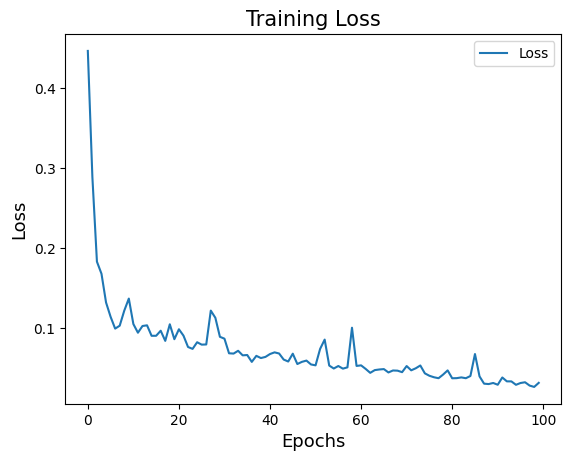

In [27]:
plt.plot(history.history["loss"])
plt.xlabel("Epochs", fontsize = 13)
plt.ylabel("Loss", fontsize = 13)
plt.legend(["Loss"])
plt.title("Training Loss", fontsize = 15)
plt.show()

In [28]:
from tensorflow.keras.models import load_model
model = load_model(r"C:\Vishnu Vardhan\SUNY Buffalo\Fall 2023\Statistical Machine Learning\Project\Models\WikiENViewsModelW7.h5")

In [29]:
#Creating an empty forecasts list:
lstm_predictions_scaled = []

#Creating a batch of the latest data points based on the window size for forecast:
batch = train_scaled[-window_size:]
#Reshaping the batch as per model requirements:
current_batch = batch.reshape((1, window_size, 1))

#Iteratively making the forecast for each day of the next 3 months:
for i in range(len(test)):
    #Forecasting the next day using previous 7 (window size) data points.
    lstm_pred = model.predict(current_batch)[0]
    #Appending the next day forecast to the forecasts list:
    lstm_predictions_scaled.append(lstm_pred) 
    #Appending the next day forecast to the current batch and 
    #removing the earliest data point in its place to preserve the window size:
    current_batch = np.append(current_batch[:, 1:, :], [[lstm_pred]], axis = 1)
    
#Since the original values were scaled before training the model, we need to 
#inverse scale the forecast in order to get the forecast for the original data. 
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

1/1 [==============================] - 0s 26ms/step


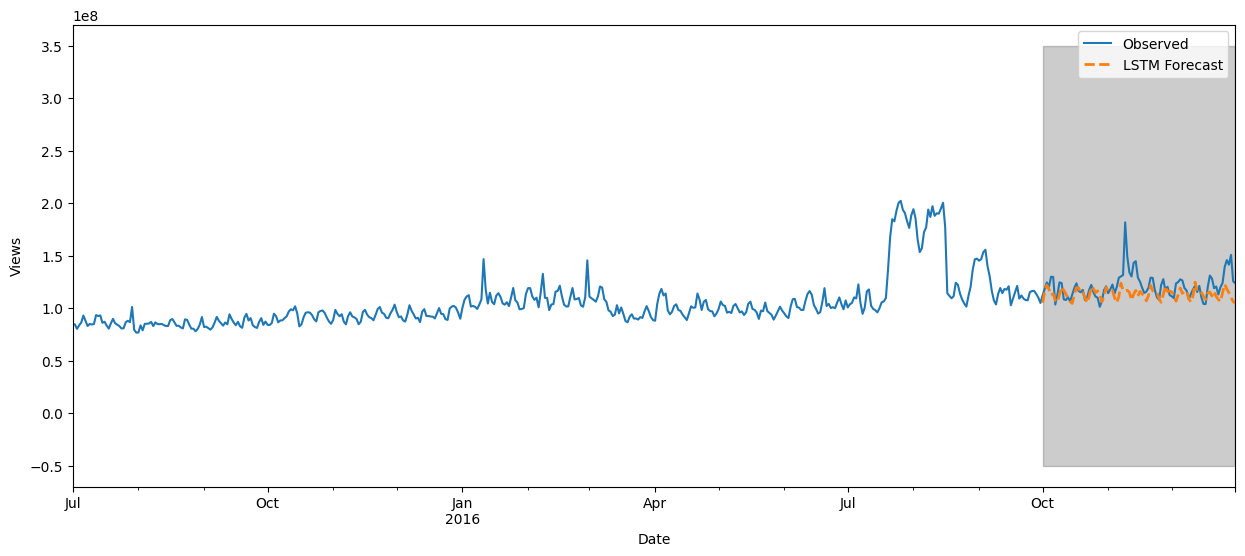

In [30]:
#Plotting the LSTM forecast:

lstm_preds = pd.DataFrame(data = [lstm_predictions[i][0] for i in range(0, len(lstm_predictions))], columns = ['LSTM Forecast']).set_index(test.index)
ax3 = y['2015':].plot(label = 'Observed')
ax3.fill_between(y['2016-10-01':].index, [-0.5*10**8 for i in y['2016-10-01':]], [3.5*10**8 for i in y['2016-10-01':]], color = 'k', alpha = 0.2)
lstm_preds.plot(ax = ax3, label = 'LSTM Forecast', figsize = (15, 6), linewidth = 2, linestyle = 'dashed')
ax3.set_xlabel('Date')
ax3.set_ylabel('Views')
plt.legend()
plt.show()

In [31]:
#LSTM model metrics:

y_forecasted_LSTM = lstm_preds['LSTM Forecast']
y_truth = test

mse_LSTM = ((y_forecasted_LSTM - y_truth) ** 2).mean()
print('The Root Mean Squared Error of LSTM forecast is {}'.format(round(np.sqrt(mse_LSTM), 2)))

denominator = (np.abs(y_truth) + np.abs(y_forecasted_LSTM)) / 2.0
diff = np.abs(y_truth - y_forecasted_LSTM) / denominator
diff[denominator == 0] = 0.0 # handling the case where the denominator is zero

print('The Symmetric Mean Absolute Percentage Error of LSTM forecast is {}'.format(round(100.0 * np.mean(diff))))

The Root Mean Squared Error of LSTM forecast is 13767506.34
The Symmetric Mean Absolute Percentage Error of LSTM forecast is 8


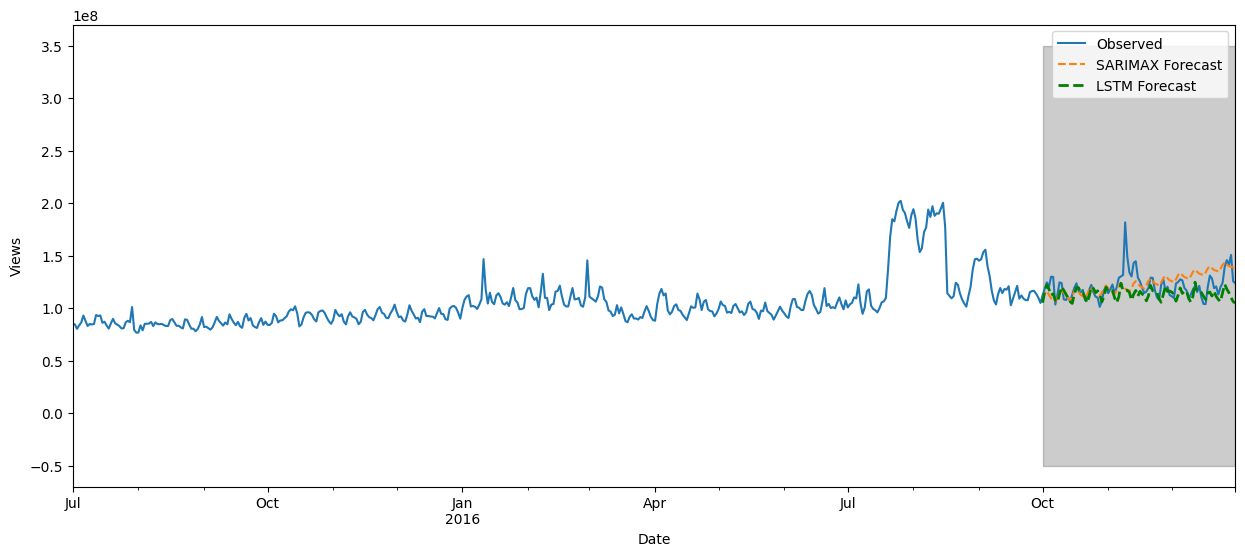

In [32]:
plt.figure(figsize = (15, 6))
ax1 = y['2015':].plot(label = 'Observed')
forecast.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
ax1.fill_between(y['2016-10-01':].index, [-0.5*10**8 for i in y['2016-10-01':]], [3.5*10**8 for i in y['2016-10-01':]], color = 'k', alpha = 0.2)
lstm_preds.plot(ax = ax1, label = 'LSTM Forecast', linewidth = 2, linestyle = 'dashed', color = 'green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Views')
plt.legend()
plt.show()

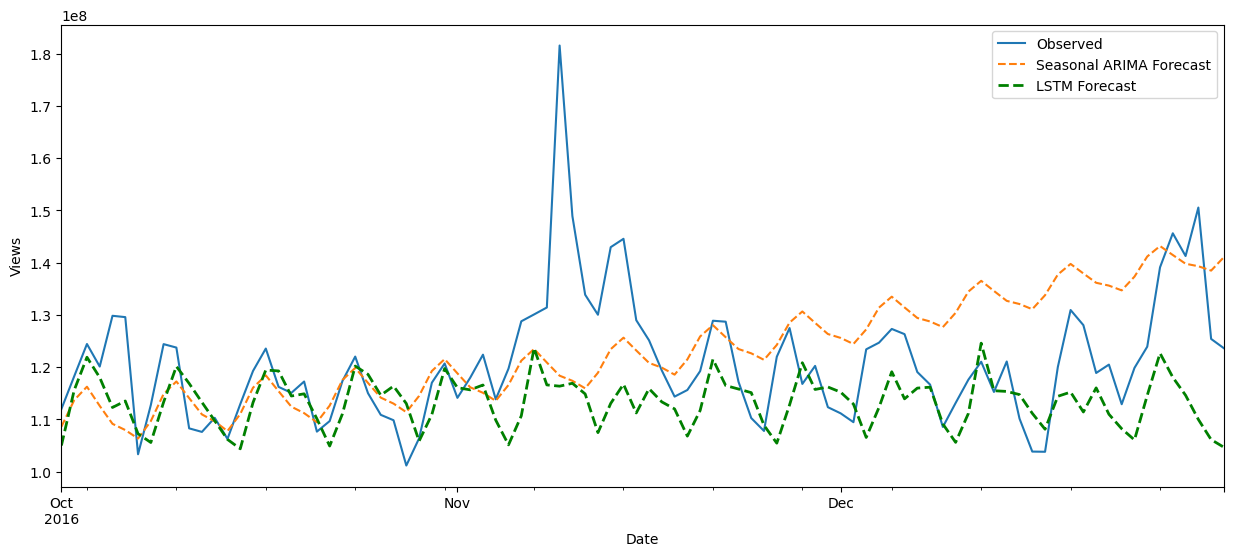

In [33]:
#LSTM and SARIMA model forecasts:

plt.figure(figsize = (15, 6))
ax1 = y['2016-10-01':].plot(label = 'Observed')
forecast.plot(ax = ax1, label = 'Seasonal ARIMA Forecast', figsize = (15, 6), linestyle = 'dashed')
#ax1.fill_between(y['2016-10-01':].index, [-0.5*10**8 for i in y['2016-10-01':]], [3.5*10**8 for i in y['2016-10-01':]], color = 'k', alpha = 0.2)
lstm_preds.plot(ax = ax1, label = 'LSTM Forecast', linewidth = 2, linestyle = 'dashed', color = 'green')
ax1.set_xlabel('Date')
ax1.set_ylabel('Views')
plt.legend()
plt.show()

In [34]:
arima_preds = pd.DataFrame(forecast, columns = ['ARIMA Forecast'])

In [35]:
ensemble_forecast = pd.DataFrame(pd.concat([lstm_preds, arima_preds], axis=1).mean(axis=1), columns = ['Ensemble Forecast'])
ensemble_forecast

,Ensemble Forecast
2016-10-01,1.068024e+08
2016-10-02,1.146304e+08
2016-10-03,1.190810e+08
2016-10-04,1.153024e+08
2016-10-05,1.107169e+08
...,...
2016-12-27,1.297658e+08
2016-12-28,1.272093e+08
2016-12-29,1.246561e+08
2016-12-30,1.223094e+08


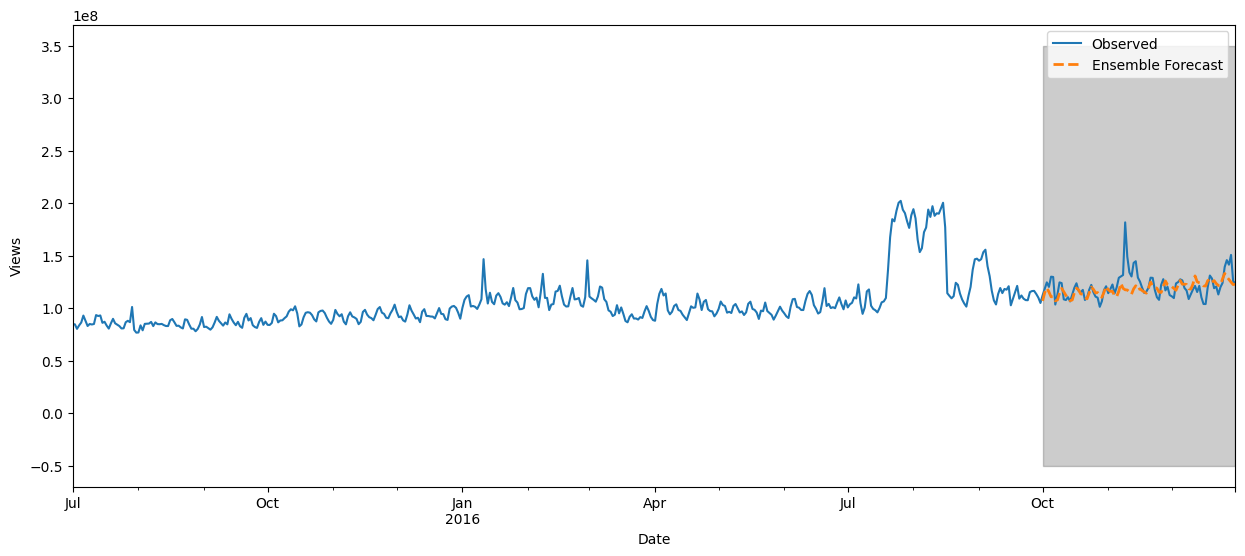

In [36]:
ax6 = y['2015':].plot(label = 'Observed')
ax6.fill_between(y['2016-10-01':].index, [-0.5*10**8 for i in y['2016-10-01':]], [3.5*10**8 for i in y['2016-10-01':]], color = 'k', alpha = 0.2)
ensemble_forecast.plot(ax = ax6, label = 'Ensemble Forecast', figsize = (15, 6), linewidth = 2, linestyle = 'dashed')
ax6.set_xlabel('Date')
ax6.set_ylabel('Views')
plt.legend()
plt.show()

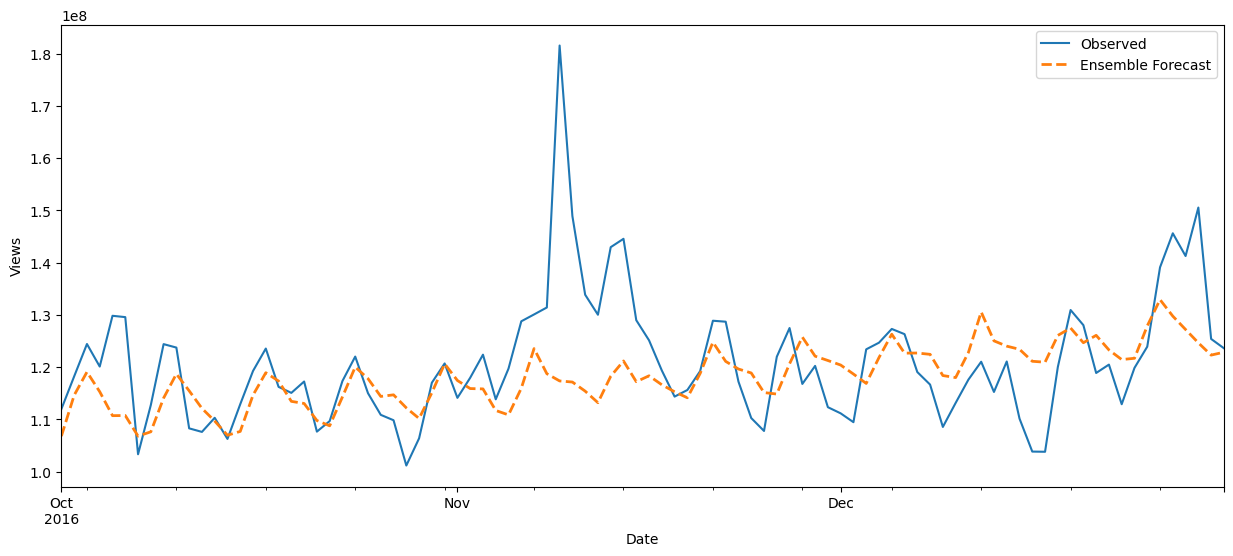

In [37]:
#Ensemble model forecast:

ax6 = y['2016-10-01':].plot(label = 'Observed')
ensemble_forecast.plot(ax = ax6, label = 'Ensemble Forecast', figsize = (15, 6), linewidth = 2, linestyle = 'dashed')
ax6.set_xlabel('Date')
ax6.set_ylabel('Views')
plt.legend()
plt.show()

In [38]:
#Ensemble model metrics:

y_forecasted_ensemble = ensemble_forecast['Ensemble Forecast']
y_truth = test
mse_ensemble = ((y_forecasted_ensemble - y_truth) ** 2).mean()
print('The Root Mean Squared Error of Ensemble forecast is {}'.format(round(np.sqrt(mse_ensemble), 2)))

denominator = (np.abs(y_truth) + np.abs(y_forecasted_ensemble)) / 2.0
diff = np.abs(y_truth - y_forecasted_ensemble) / denominator
diff[denominator == 0] = 0.0 # handling the case where the denominator is zero

print('The Symmetric Mean Absolute Percentage Error of ensemble forecast is {}'.format(round(100.0 * np.mean(diff))))

The Root Mean Squared Error of Ensemble forecast is 11521797.42
The Symmetric Mean Absolute Percentage Error of ensemble forecast is 6
